In [317]:
import pandas as pd
import ast
df = pd.read_csv('20052021.csv')

In [318]:
df.head()

,_id,created_at,tweet_content,keyword,user_location,entities,classification
0,ObjectId(6091f3547ef2d107a44055cc),2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,"{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":false,""created_at"":""2021-05..."
1,ObjectId(6091f3547ef2d107a44055cd),2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,"{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":false,""created_at"":""2021-05..."
2,ObjectId(6091f3547ef2d107a44055ce),2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,"{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":false,""created_at"":""2021-05..."
3,ObjectId(6091f3547ef2d107a44055cf),2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil","{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":true,""created_at"":""2021-05-..."
4,ObjectId(6091f3547ef2d107a44055d0),2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil","{'hashtags': [], 'urls': [], 'user_mentions': ...","[{""classification"":false,""created_at"":""2021-05..."


In [319]:
df = df.drop('_id', 1)

## Separando o Json de classificação em diferentes colunas

In [320]:
df.classification[1]

'[{"classification":false,"created_at":"2021-05-10T12:43:36.439Z"},{"classification":true,"created_at":"2021-05-10T12:50:50.683Z"},{"classification":true,"created_at":"2021-05-10T13:03:11.475Z"}]'

In [321]:
classification_df = pd.DataFrame()

In [322]:
import numpy as np
import json

classification = df.classification.tolist()
for index in range(0, len(classification)):
    if classification[index] is np.nan:
        new_row = {
            'classification.1': 'n/a',
            'created_at.1': 'n/a',
            'classification.2': 'n/a',
            'created_at.2': 'n/a',
            'classification.3': 'n/a',
            'created_at.3': 'n/a'
        }
    else:
        classification_dict = eval(classification[index].replace('false', 'False').replace('true', 'True'))
        range_ = len(classification_dict)
        for teste in range(0, len(classification_dict)):
            try:
                if classification_dict[0]:
                    classification_1 = classification_dict[0]['classification']
                    created_at_1 = classification_dict[0]['created_at']
            except:
                classification_1 = 'n/a'
                created_at_1 = 'n/a'
            try:
                if classification_dict[1]:
                    classification_2 = classification_dict[1]['classification']
                    created_at_2 = classification_dict[1]['created_at']
            except:
                classification_2 = 'n/a'
                created_at_2 = 'n/a'
            try:
                if classification_dict[2]:
                    classification_3 = classification_dict[2]['classification']
                    created_at_3 = classification_dict[2]['created_at']
            except:
                classification_3 = 'n/a'
                created_at_3 = 'n/a'
            new_row = {
                'classification.1': classification_1,
                'created_at.1': created_at_1,
                'classification.2': classification_2,
                'created_at.2': created_at_2,
                'classification.3': classification_3,
                'created_at.3': created_at_3
            }
    classification_df = classification_df.append(new_row, ignore_index=True)

In [323]:
classification_df.head()

,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3
0,0,0,1,2021-05-10T12:49:58.805Z,2021-05-10T13:27:53.365Z,2021-05-10T13:35:27.396Z
1,0,1,1,2021-05-10T12:43:36.439Z,2021-05-10T12:50:50.683Z,2021-05-10T13:03:11.475Z
2,0,0,1,2021-05-10T12:38:50.850Z,2021-05-10T12:44:02.691Z,2021-05-10T12:50:28.829Z
3,1,1,1,2021-05-10T12:55:20.472Z,2021-05-10T13:04:07.714Z,2021-05-10T13:28:58.268Z
4,0,1,1,2021-05-10T12:43:09.739Z,2021-05-10T13:01:14.481Z,2021-05-10T13:31:31.120Z


In [324]:
classification_df.shape

(738, 6)

In [325]:
df.shape

(738, 6)

## Separando o Json de entities em diferentes colunas

In [326]:
df.entities[0]

"{'hashtags': [], 'urls': [], 'user_mentions': [], 'symbols': []}"

In [327]:
entities_df = pd.DataFrame()

In [328]:
entities = df.entities.tolist()
for index in range(0, len(entities)):
    if entities[index] is np.nan:
        new_row = {
            'hashtags': 'n/a',
            'urls': 'n/a',
            'user_mentions': 'n/a',
            'symbols': 'n/a'
        }
    else:
        entities_dict = eval(entities[index])
        try:
            if entities_dict:
                hashtags = entities_dict['hashtags']
                urls = entities_dict['urls']
                user_mentions = entities_dict['user_mentions']
                symbols = entities_dict['symbols']
                #print(user_mentions)
        except:
            hashtags = 'n/a'
            urls = 'n/a'
            user_mentions = 'n/a'
            symbols = 'n/a'

        new_row = {
            'hashtags': hashtags,
            'urls': urls,
            'user_mentions': user_mentions,
            'symbols': symbols
        }
    entities_df = entities_df.append(new_row, ignore_index=True)

In [329]:
entities_df.head()

,hashtags,symbols,urls,user_mentions
0,[],[],[],[]
1,[],[],[],[]
2,[],[],[],[]
3,[],[],[],[]
4,[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '..."


In [330]:
entities_df.isna().sum()

hashtags         0
symbols          0
urls             0
user_mentions    0
dtype: int64

In [331]:
entities_df.shape

(738, 4)

## Concatenando no DF inicial para criar o DF final

In [332]:
df = df.drop('classification', 1)

In [333]:
df = df.drop('entities', 1)

In [334]:
df_final = pd.concat([df, classification_df], axis=1)

In [335]:
df_final = pd.concat([df_final, entities_df], axis=1)

In [336]:
df_final.shape

(738, 14)

In [337]:
df_final.head()

,created_at,tweet_content,keyword,user_location,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3,hashtags,symbols,urls,user_mentions
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,0,0,1,2021-05-10T12:49:58.805Z,2021-05-10T13:27:53.365Z,2021-05-10T13:35:27.396Z,[],[],[],[]
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,0,1,1,2021-05-10T12:43:36.439Z,2021-05-10T12:50:50.683Z,2021-05-10T13:03:11.475Z,[],[],[],[]
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,0,0,1,2021-05-10T12:38:50.850Z,2021-05-10T12:44:02.691Z,2021-05-10T12:50:28.829Z,[],[],[],[]
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",1,1,1,2021-05-10T12:55:20.472Z,2021-05-10T13:04:07.714Z,2021-05-10T13:28:58.268Z,[],[],[],[]
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",0,1,1,2021-05-10T12:43:09.739Z,2021-05-10T13:01:14.481Z,2021-05-10T13:31:31.120Z,[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '..."


In [338]:
df_final.shape

(738, 14)

In [339]:
df_final.isna().sum()

created_at          0
tweet_content       0
keyword             0
user_location       1
classification.1    0
classification.2    0
classification.3    0
created_at.1        0
created_at.2        0
created_at.3        0
hashtags            0
symbols             0
urls                0
user_mentions       0
dtype: int64

# Análise exploratória

In [340]:
df_final["classification.1"] = df_final["classification.1"].replace([True], 1)
df_final["classification.1"] = df_final["classification.1"].replace([False], 0)

df_final["classification.2"] = df_final["classification.2"].replace([True], 1)
df_final["classification.2"] = df_final["classification.2"].replace([False], 0)

df_final["classification.3"] = df_final["classification.3"].replace([True], 1)
df_final["classification.3"] = df_final["classification.3"].replace([False], 0)

In [341]:
df_final.describe()

,created_at,tweet_content,keyword,user_location,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3,hashtags,symbols,urls,user_mentions
count,738,738,738,737,738,738,738,738,738,738,738,738,738,738
unique,691,728,10,377,3,3,3,667,541,407,7,1,1,250
top,2021-05-10 15:40:12,"""nike ou adidas?""\n\nseios",['Nubank'],None,1,1,n/a,n/a,n/a,n/a,[],[],[],[]
freq,3,2,236,212,359,278,332,72,198,332,732,738,738,415


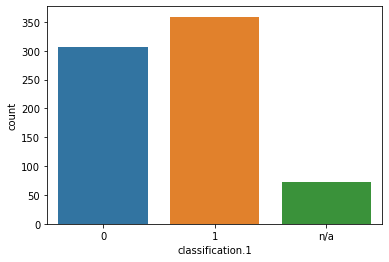

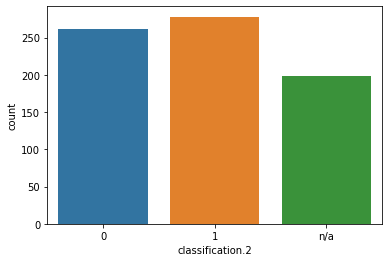

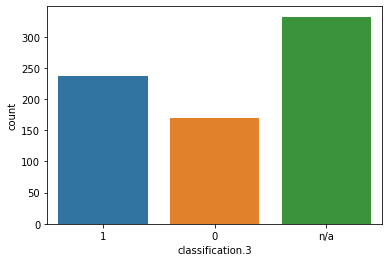

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="classification.1", data=df_final)
plt.show()
sns.countplot(x="classification.2", data=df_final)
plt.show()
sns.countplot(x="classification.3", data=df_final)
plt.show()

In [343]:
df_final["classification.3"].unique()

array([1, 0, 'n/a'], dtype=object)

In [344]:
def find_avg_sentiment(index):
    class_1 = df_final['classification.1'][index]
    class_2 = df_final['classification.2'][index]
    class_3 = df_final['classification.3'][index]
    
    if class_1 and class_2 and class_3 == 'n/a':
        avg_list = 'n/a'
        return avg_list
    elif class_2 and class_3 == 'n/a':
        avg_list = [class_1]
    elif class_3 == 'n/a':
        avg_list = [class_1, class_2]
    else:
        avg_list = [class_1, class_2, class_3]
    avg_classification = sum(avg_list)/len(avg_list)
    if avg_classification < 0.5:
        avg_sentiment = 0
    else:
        avg_sentiment = 1
    return avg_sentiment

In [345]:
avg_sentiment_list = []
for index in range(0,len(df_final)):
    avg_sentiment = find_avg_sentiment(index)
    avg_sentiment_list.append(avg_sentiment)
df_final['avg_sentiment'] = avg_sentiment_list

In [346]:
df_final.head()

,created_at,tweet_content,keyword,user_location,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3,hashtags,symbols,urls,user_mentions,avg_sentiment
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,0,0,1,2021-05-10T12:49:58.805Z,2021-05-10T13:27:53.365Z,2021-05-10T13:35:27.396Z,[],[],[],[],0
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,0,1,1,2021-05-10T12:43:36.439Z,2021-05-10T12:50:50.683Z,2021-05-10T13:03:11.475Z,[],[],[],[],1
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,0,0,1,2021-05-10T12:38:50.850Z,2021-05-10T12:44:02.691Z,2021-05-10T12:50:28.829Z,[],[],[],[],0
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",1,1,1,2021-05-10T12:55:20.472Z,2021-05-10T13:04:07.714Z,2021-05-10T13:28:58.268Z,[],[],[],[],1
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",0,1,1,2021-05-10T12:43:09.739Z,2021-05-10T13:01:14.481Z,2021-05-10T13:31:31.120Z,[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '...",1


In [347]:
df_final.shape

(738, 15)

In [361]:
df_final['avg_sentiment'].nunique()

2

In [350]:
df_final['avg_sentiment'].unique()

array([0, 1, 'n/a'], dtype=object)

In [351]:
df_avg_sentiment = pd.DataFrame()

In [352]:
df_avg_sentiment = df_final

In [354]:
indexNames = df_avg_sentiment[(df_avg_sentiment['avg_sentiment'] == 'n/a')].index
df_avg_sentiment.drop(indexNames , inplace=True)

In [355]:
df_avg_sentiment.shape

(550, 15)

In [356]:
df_avg_sentiment.head()

,created_at,tweet_content,keyword,user_location,classification.1,classification.2,classification.3,created_at.1,created_at.2,created_at.3,hashtags,symbols,urls,user_mentions,avg_sentiment
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,0,0,1,2021-05-10T12:49:58.805Z,2021-05-10T13:27:53.365Z,2021-05-10T13:35:27.396Z,[],[],[],[],0
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,0,1,1,2021-05-10T12:43:36.439Z,2021-05-10T12:50:50.683Z,2021-05-10T13:03:11.475Z,[],[],[],[],1
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,0,0,1,2021-05-10T12:38:50.850Z,2021-05-10T12:44:02.691Z,2021-05-10T12:50:28.829Z,[],[],[],[],0
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",1,1,1,2021-05-10T12:55:20.472Z,2021-05-10T13:04:07.714Z,2021-05-10T13:28:58.268Z,[],[],[],[],1
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",0,1,1,2021-05-10T12:43:09.739Z,2021-05-10T13:01:14.481Z,2021-05-10T13:31:31.120Z,[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '...",1


In [358]:
df_avg_sentiment['avg_sentiment'].unique()

array([0, 1], dtype=object)

In [363]:
df_avg_sentiment['avg_sentiment'] = df_avg_sentiment['avg_sentiment'].astype(int)

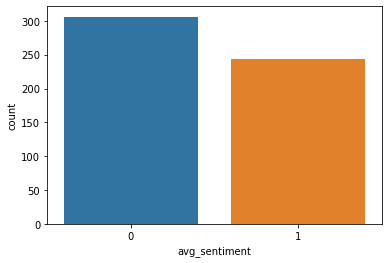

In [364]:
sns.countplot(x="avg_sentiment", data=df_avg_sentiment)
plt.show()

In [366]:
df_avg_sentiment['keyword'].unique()

array(["['Nubank']", "['Coca-cola']", "['Nike']", "['Xiaomi']",
       "['Coca cola']", "['SHEIN']", '[]', "['Boticário']",
       "['Nike', 'SHEIN']"], dtype=object)

In [373]:
df_avg_sentiment.columns

Index(['created_at', 'tweet_content', 'keyword', 'user_location',
       'classification.1', 'classification.2', 'classification.3',
       'created_at.1', 'created_at.2', 'created_at.3', 'hashtags', 'symbols',
       'urls', 'user_mentions', 'avg_sentiment'],
      dtype='object')

In [375]:
df_avg_sentiment = df_avg_sentiment[['created_at', 'tweet_content', 'keyword', 'user_location', 'hashtags', 'symbols', 'urls', 'user_mentions', 'avg_sentiment']]

In [376]:
df_avg_sentiment.head()

,created_at,tweet_content,keyword,user_location,hashtags,symbols,urls,user_mentions,avg_sentiment
0,2021-05-04 12:30:48,mds nubank nunca libera mais limite pra mim,['Nubank'],Goiânia,[],[],[],[],0
1,2021-05-04 12:31:09,mais viciado que a bateria do meu celular só e...,['Coca-cola'],Balneário Camboriú,[],[],[],[],1
2,2021-05-04 12:31:27,toda vez que vejo Nubank nos tt vou lá conferi...,['Nubank'],None,[],[],[],[],0
3,2021-05-04 12:31:25,Pedi 10k de limite pra Nubank serasi?,['Nubank'],"Rio de Janeiro, Brasil",[],[],[],[],1
4,2021-05-04 12:31:20,@kayofeer @nubank Aconteceu isso c a minha mãe...,['Nubank'],"Macaé, Brasil",[],[],[],"[{'screen_name': 'kayofeer', 'name': 'Kayo', '...",1


In [378]:
df_avg_sentiment.shape

(550, 9)

<AxesSubplot:>

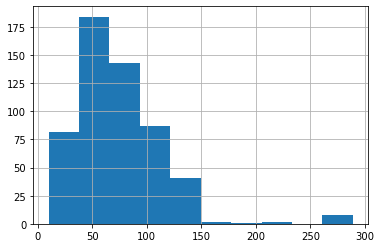

In [381]:
# Quantidade de caracteres por tweet
df_avg_sentiment['tweet_content'].str.len().hist()

# A maioria está entre 15 e 150 caracteres

In [383]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

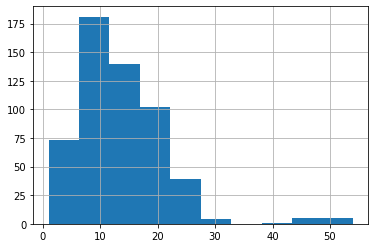

In [385]:
# Quantidade de palavras por tweet
plot_word_number_histogram(df_avg_sentiment['tweet_content'])

# A maioria está entre 2 a 25 palavras

In [386]:
def plot_average_word_lenght(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).hist()

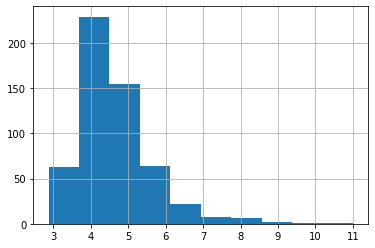

In [388]:
# Tamanho médio das palavras nos tweets
plot_average_word_lenght(df_avg_sentiment['tweet_content'])

In [389]:
# Removendo stop words
import nltk

In [391]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fabianagarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [425]:
from nltk.corpus import stopwords
stop=set(stopwords.words('portuguese'))
custom_stop=['pra', 'q', 'tá']

In [426]:
# Top Stopwords

import matplotlib.pyplot as plt
import numpy as np

def plot_top_stopwords_barchart(text):
   
    palavras = text.str.split()
    palavras = palavras.values.tolist()
    corpus = [palavra for i in palavras for palavra in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for palavra in corpus:
        if palavra in stop:
            dic[palavra] += 1
        if palavra in custom_stop:
            dic[palavra] += 1
            
    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10] 
    x,y = zip(*top)
    plt.bar(x,y)

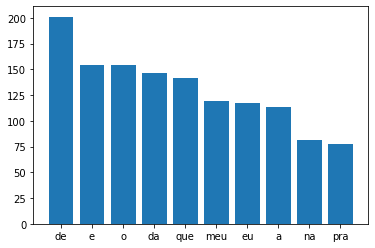

In [427]:
plot_top_stopwords_barchart(df_avg_sentiment['tweet_content'])

In [442]:
# Top Non Stopwords

import seaborn as sns
from collections import Counter

def plot_top_non_stopwords_barchart(text):
    
    palavras = text.str.split()
    palavras = palavras.values.tolist()
    corpus = [palavra.lower() for i in palavras for palavra in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x,y = [],[]
    for palavra, count in most[:40]:
        if (palavra not in stop) and (palavra not in custom_stop):
            x.append(palavra)
            y.append(count)
            
    fig, ax = plt.subplots(figsize=(10,15))  
    sns.barplot(x=y,y=x,ax=ax)

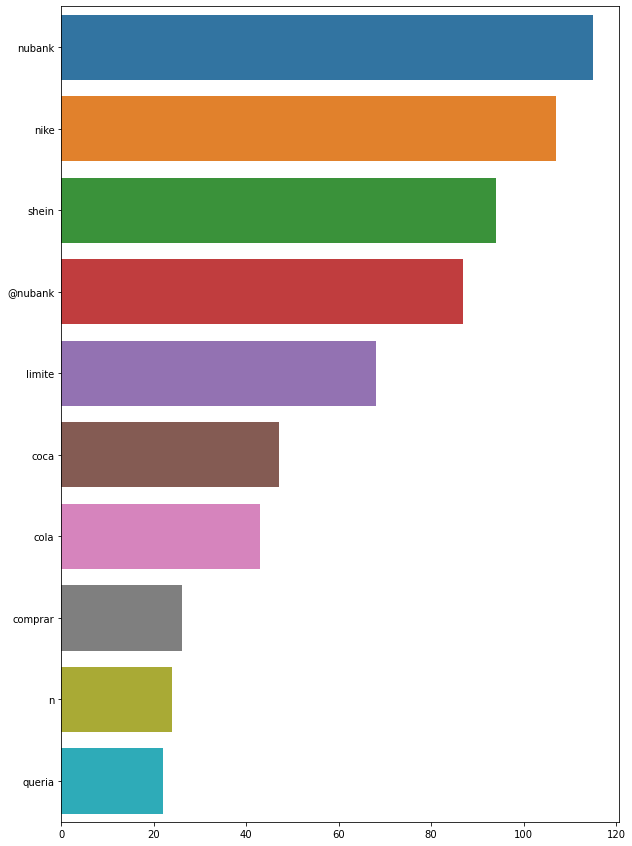

In [443]:
plot_top_non_stopwords_barchart(df_avg_sentiment['tweet_content'])